<a href="https://colab.research.google.com/github/muli2487/Twitter-Sentiment-Analysis-and-Bitcoin-Stock-Prediction/blob/master/Time_Series_Bitcoin_using_FBProphet%20with%20metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series - Facebook Prophet

# Importing Libraries

In [0]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
import _pickle as pickle

from fbprophet import Prophet as proph

In [0]:
url = 'https://www.quandl.com/api/v3/datasets/BCHAIN/MKPRU.csv?api_key=Lq43ztbiWJ73CJUDPiye&start_date=2017-08-01&end_date=2020-5-29&order=asc'

## Loading in the Data

In [96]:
df= pd.read_csv(url)
df.head()

,Date,Value
0,2017-08-01,2866.431667
1,2017-08-02,2710.413067
2,2017-08-03,2693.633983
3,2017-08-04,2794.117717
4,2017-08-05,2873.851083


## Formatting the data for Facebook Prophet

In [97]:
# Resetting the index back so Dates are no longer indexed
#df.reset_index(inplace=True)

# Renaming the columns for use in FB prophet
df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)

df.head()

,ds,y
0,2017-08-01,2866.431667
1,2017-08-02,2710.413067
2,2017-08-03,2693.633983
3,2017-08-04,2794.117717
4,2017-08-05,2873.851083


## Plotting the data

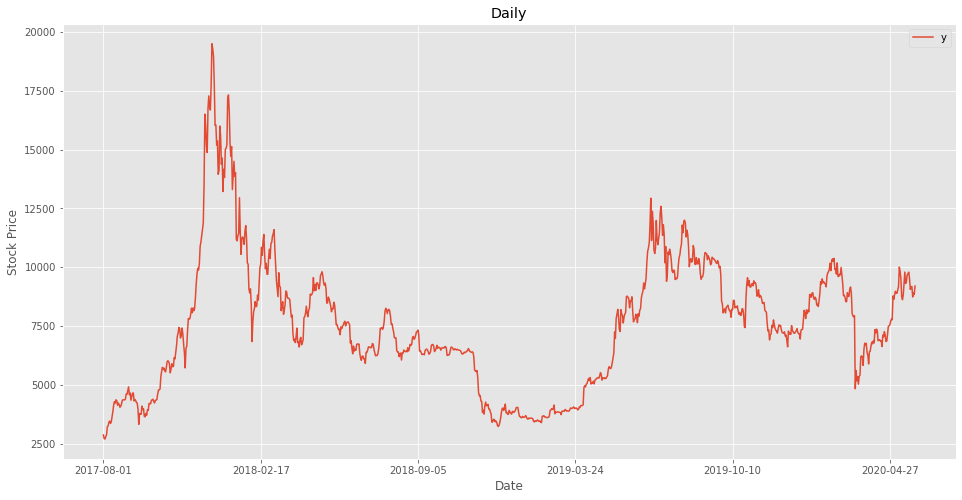

In [98]:
# Plotting the price 
pd.plotting.register_matplotlib_converters()

ax = df.set_index('ds').plot(figsize=(16,8))
ax.set_title("Daily")
ax.set_ylabel('Stock Price')
ax.set_xlabel('Date')

plt.show()

## Modeling

In [99]:
# Fitting and training
mod = proph(interval_width=0.95, daily_seasonality=True)
mod.fit(df)

## Creating Future dates to Forescast

In [100]:
# Setting up predictions to be made
future = mod.make_future_dataframe(periods=90, freq='D')
future.tail()

,ds
1118,2020-08-23
1119,2020-08-24
1120,2020-08-25
1121,2020-08-26
1122,2020-08-27


## Forecasting Future Values

In [101]:
forecast = mod.predict(future)

# Saving the last prediction for later
day90pred = forecast[['yhat']].iloc[[-1]]

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1118,2020-08-23,11427.457511,8129.352326,13754.443424,9406.298104,13514.089778,-550.951146,-550.951146,-550.951146,-2337.671817,-2337.671817,-2337.671817,32.922964,32.922964,32.922964,1753.797707,1753.797707,1753.797707,0.0,0.0,0.0,10876.506364
1119,2020-08-24,11428.628338,7622.207485,13813.315624,9370.288516,13552.311835,-610.886631,-610.886631,-610.886631,-2337.671817,-2337.671817,-2337.671817,6.870834,6.870834,6.870834,1719.914353,1719.914353,1719.914353,0.0,0.0,0.0,10817.741707
1120,2020-08-25,11429.799164,7863.546171,13702.105502,9338.771342,13586.239874,-659.561184,-659.561184,-659.561184,-2337.671817,-2337.671817,-2337.671817,-6.289023,-6.289023,-6.289023,1684.399657,1684.399657,1684.399657,0.0,0.0,0.0,10770.237981
1121,2020-08-26,11430.969991,7774.741589,13803.810767,9308.044530,13627.595262,-683.013286,-683.013286,-683.013286,-2337.671817,-2337.671817,-2337.671817,7.174152,7.174152,7.174152,1647.484379,1647.484379,1647.484379,0.0,0.0,0.0,10747.956706
1122,2020-08-27,11432.140818,7669.760155,13809.519465,9277.437288,13666.843176,-743.071379,-743.071379,-743.071379,-2337.671817,-2337.671817,-2337.671817,-14.800674,-14.800674,-14.800674,1609.401113,1609.401113,1609.401113,0.0,0.0,0.0,10689.069439


In [102]:
# Python
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(mod, initial='890 days', period='45 days', horizon = '90 days')
df_cv

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-01-15 00:00:00 and 2020-02-29 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-01-16,6501.452707,4403.140251,8601.874585,8842.42,2020-01-15
1,2020-01-17,6363.364732,4337.089538,8498.459327,8813.89,2020-01-15
2,2020-01-18,6190.296162,3897.983754,8437.315085,8722.03,2020-01-15
3,2020-01-19,6101.487509,3959.087805,8162.997302,8900.34,2020-01-15
4,2020-01-20,5916.501011,3977.158030,7997.221048,8910.85,2020-01-15
...,...,...,...,...,...,...
175,2020-05-25,12448.557373,9556.365918,15313.024033,9178.32,2020-02-29
176,2020-05-26,12451.070617,9407.946407,15432.285003,8730.73,2020-02-29
177,2020-05-27,12450.755530,9539.327956,15402.415608,8899.66,2020-02-29
178,2020-05-28,12418.183912,9303.016497,15371.394182,8842.85,2020-02-29


In [103]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days,4.337290e+06,2082.616140,1624.908189,0.185692,0.174330,0.5
1,10 days,4.712797e+06,2170.897814,1703.785712,0.196285,0.194364,0.5
2,11 days,5.113190e+06,2261.236403,1778.931259,0.206351,0.204016,0.5
3,12 days,5.528290e+06,2351.231590,1852.957177,0.216449,0.216114,0.5
4,13 days,6.067175e+06,2463.163591,1951.950586,0.229089,0.226898,0.5


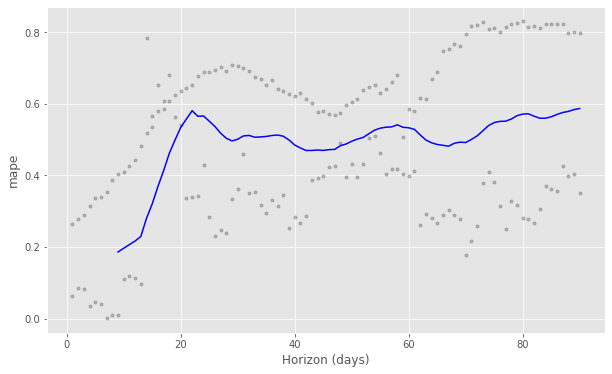

In [104]:
# Python
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

## Plotting Values
# Blue line = forecasted values
# Black dots = observed values
# Uncertainty intervals = blue shaded region

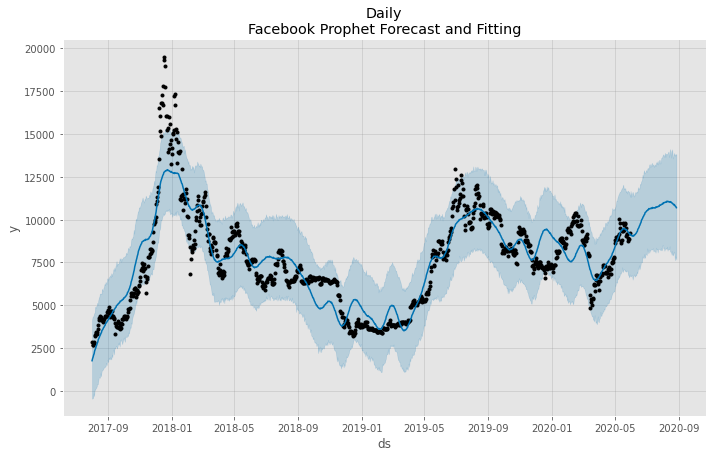

In [105]:
mod.plot(forecast, uncertainty=True)
plt.title('Daily\nFacebook Prophet Forecast and Fitting')
plt.show()

In [0]:
## Graph Above Zoomed in

## Plotted Componenets of the forecast

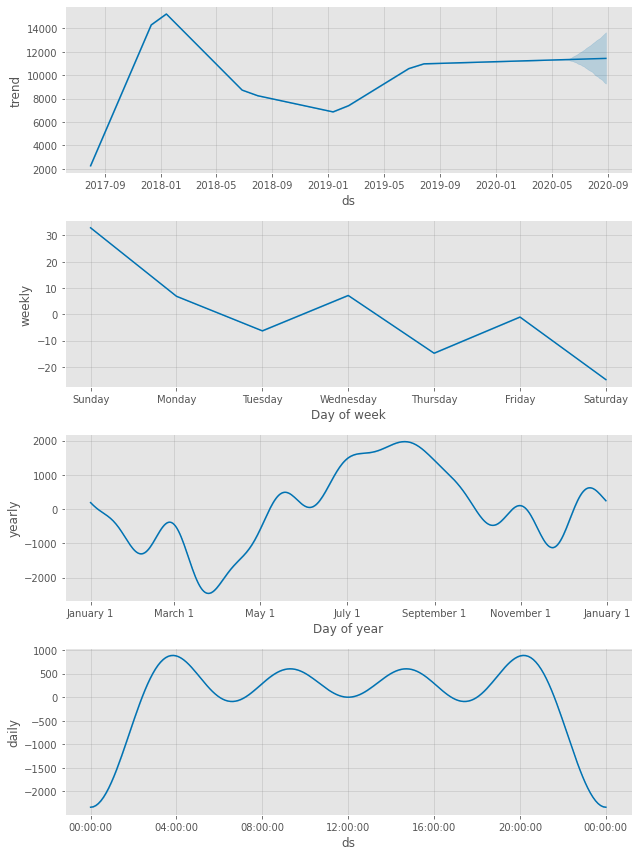

In [107]:
mod.plot_components(forecast)
plt.show()

## FBProphet for Monthly Data

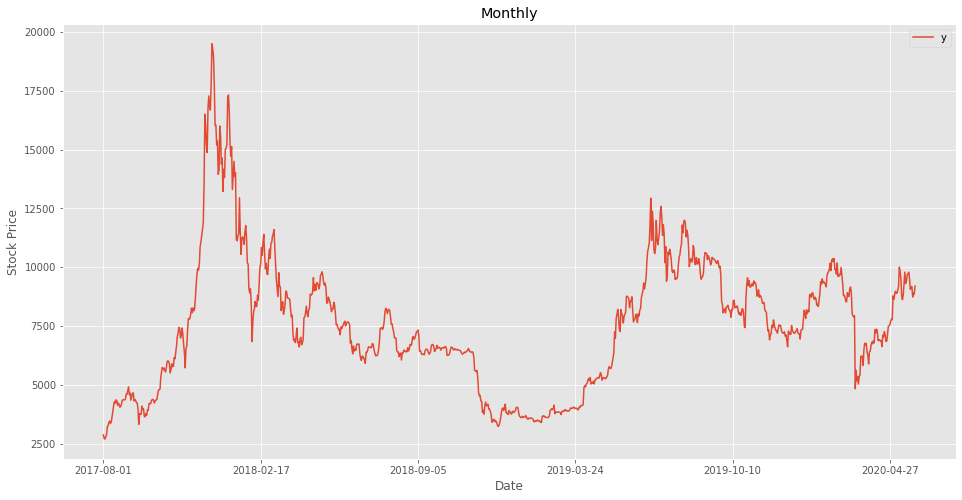

In [108]:
# Plotting the price 
pd.plotting.register_matplotlib_converters()

ax = df.set_index('ds').plot(figsize=(16,8))
ax.set_title("Monthly")
ax.set_ylabel('Stock Price')
ax.set_xlabel('Date')

plt.show()

In [109]:
# Fitting and training
mod = proph(interval_width=0.95)
mod.fit(df)

# Setting up predictions to be made
future = mod.make_future_dataframe(periods=3, freq='M')

# Making predictions
forecast = mod.predict(future)

# Saving the last prediction for later
month3pred = forecast[['yhat']].iloc[[-1]]
forecast.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1031,2020-05-28,8964.800297,6940.128521,11421.504838,8964.800297,8964.800297,182.448944,182.448944,182.448944,-14.577043,-14.577043,-14.577043,197.025987,197.025987,197.025987,0.0,0.0,0.0,9147.249241
1032,2020-05-29,8965.785859,6776.189831,11535.315764,8965.785859,8965.785859,157.062082,157.062082,157.062082,-0.891924,-0.891924,-0.891924,157.954007,157.954007,157.954007,0.0,0.0,0.0,9122.847942
1033,2020-05-31,8967.756984,6727.015154,11576.045049,8967.753735,8967.756984,121.534854,121.534854,121.534854,32.568157,32.568157,32.568157,88.966697,88.966697,88.966697,0.0,0.0,0.0,9089.291837
1034,2020-06-30,8997.323855,7895.709312,12809.265278,8577.105439,9457.348549,1394.563326,1394.563326,1394.563326,-5.896689,-5.896689,-5.896689,1400.460015,1400.460015,1400.460015,0.0,0.0,0.0,10391.887181
1035,2020-07-31,9027.876288,8219.632560,13500.675753,7793.239817,10348.979732,1874.010500,1874.010500,1874.010500,-0.891924,-0.891924,-0.891924,1874.902424,1874.902424,1874.902424,0.0,0.0,0.0,10901.886788


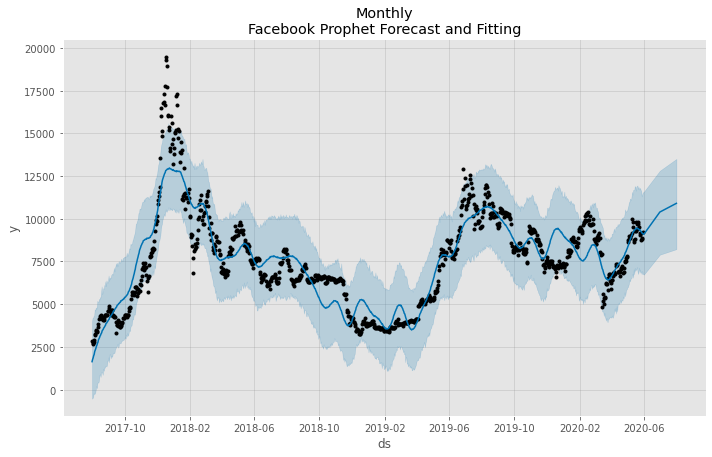

In [110]:
# Plotting the fit and forecast
mod.plot(forecast, uncertainty=True)
plt.title('Monthly\nFacebook Prophet Forecast and Fitting')
plt.show()

In [111]:
# Python
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(mod, initial='730 days', period='45 days', horizon = '90 days')
df_cv.head()

INFO:fbprophet:Making 5 forecasts with cutoffs between 2019-09-02 00:00:00 and 2020-02-29 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-09-03,11845.684802,9508.330696,13967.520374,9769.79,2019-09-02
1,2019-09-04,11892.947854,9598.674109,14249.977553,10386.64,2019-09-02
2,2019-09-05,11890.726939,9496.790697,14213.744535,10621.29,2019-09-02
3,2019-09-06,11932.915154,9721.629214,14044.622575,10584.16,2019-09-02
4,2019-09-07,11955.854615,9653.734937,14226.593445,10577.80,2019-09-02


In [112]:
# Python
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days,3.992735e+06,1998.182820,1787.829307,0.212211,0.214669,0.666667
1,10 days,4.314942e+06,2077.243788,1861.889331,0.221761,0.229804,0.644444
2,11 days,4.663281e+06,2159.463055,1932.346936,0.230753,0.237155,0.622222
3,12 days,4.978773e+06,2231.316520,1987.876532,0.237789,0.229804,0.600000
4,13 days,5.373264e+06,2318.030092,2061.950375,0.246824,0.214669,0.577778


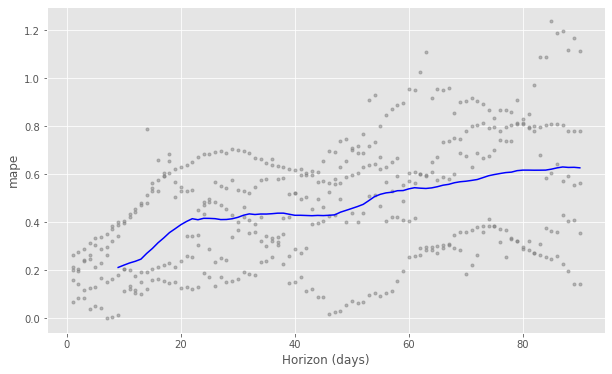

In [113]:
# Python
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

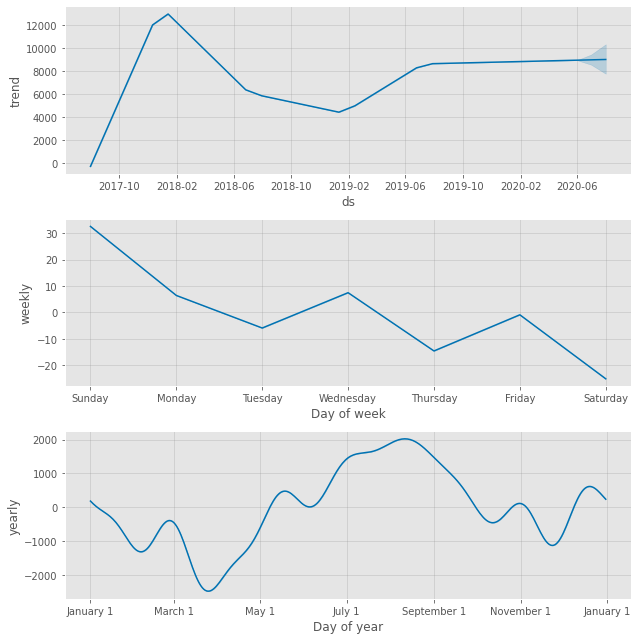

In [114]:
# Plotting the components
mod.plot_components(forecast)
plt.show()

## FBProphet for Weekly Data

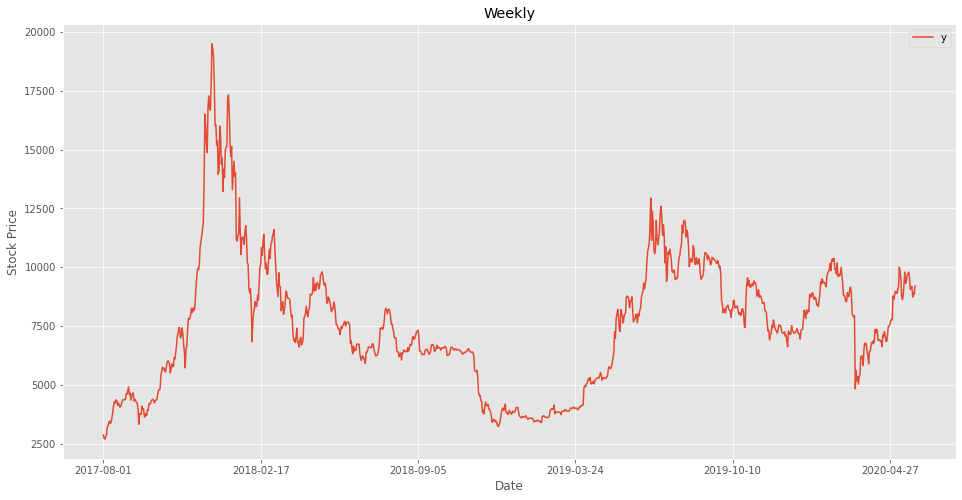

In [115]:
# Plotting the price 
pd.plotting.register_matplotlib_converters()

ax = df.set_index('ds').plot(figsize=(16,8))
ax.set_title("Weekly")
ax.set_ylabel('Stock Price')
ax.set_xlabel('Date')

plt.show()

In [116]:
# Fitting and training
mod = proph(interval_width=0.95, weekly_seasonality=True)
mod.fit(df)

# Setting up predictions to be made
future = mod.make_future_dataframe(periods=12, freq='W')

# Making predictions
forecast = mod.predict(future)

# Saving the last prediction for later
week12pred = forecast[['yhat']].iloc[[-1]]

forecast.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1040,2020-07-19,9016.049539,8284.975382,13174.393503,8000.868210,9847.515923,1681.886328,1681.886328,1681.886328,32.568157,32.568157,32.568157,1649.318171,1649.318171,1649.318171,0.0,0.0,0.0,10697.935868
1041,2020-07-26,9022.948476,8118.467069,13246.488589,7807.918084,10001.322278,1797.028642,1797.028642,1797.028642,32.568157,32.568157,32.568157,1764.460485,1764.460485,1764.460485,0.0,0.0,0.0,10819.977118
1042,2020-08-02,9029.847412,8198.358045,13716.175515,7651.241535,10154.296226,1949.946113,1949.946113,1949.946113,32.568157,32.568157,32.568157,1917.377956,1917.377956,1917.377956,0.0,0.0,0.0,10979.793526
1043,2020-08-09,9036.746349,8373.289272,13714.620663,7450.669944,10346.998019,2047.724881,2047.724881,2047.724881,32.568157,32.568157,32.568157,2015.156724,2015.156724,2015.156724,0.0,0.0,0.0,11084.471230
1044,2020-08-16,9043.645285,8180.749393,13746.039665,7230.851018,10532.426603,2012.310433,2012.310433,2012.310433,32.568157,32.568157,32.568157,1979.742276,1979.742276,1979.742276,0.0,0.0,0.0,11055.955718


In [117]:
# Python
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(mod, initial='850 days', period='45 days', horizon = '90 days')
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2019-12-01 00:00:00 and 2020-02-29 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-12-02,8774.861964,6533.765987,10843.317033,7557.72,2019-12-01
1,2019-12-03,8924.818648,6822.699476,11018.185149,7402.69,2019-12-01
2,2019-12-04,9100.956124,6872.777478,11251.480692,7309.59,2019-12-01
3,2019-12-05,9223.792085,7152.615822,11450.445132,7296.77,2019-12-01
4,2019-12-06,9397.698830,7155.368905,11575.270911,7192.85,2019-12-01


In [118]:
# Python
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
77,86 days,1.612711e+07,4015.857613,3805.670147,0.471754,0.329881,0.333333
78,87 days,1.637155e+07,4046.176720,3817.324280,0.471687,0.323830,0.370370
79,88 days,1.625015e+07,4031.147955,3787.073499,0.469028,0.361844,0.370370
80,89 days,1.614303e+07,4017.838366,3753.117374,0.466745,0.366094,0.370370
81,90 days,1.591851e+07,3989.800597,3697.228564,0.462044,0.366094,0.370370


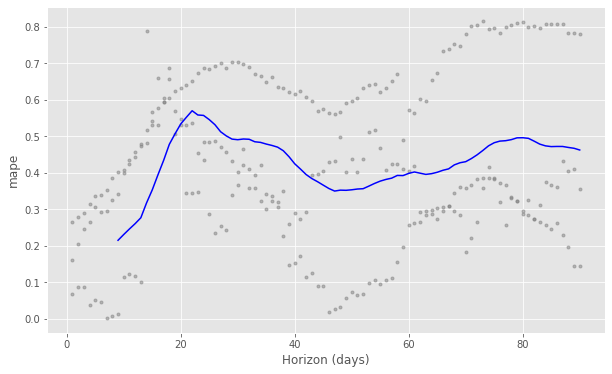

In [119]:
# Python
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

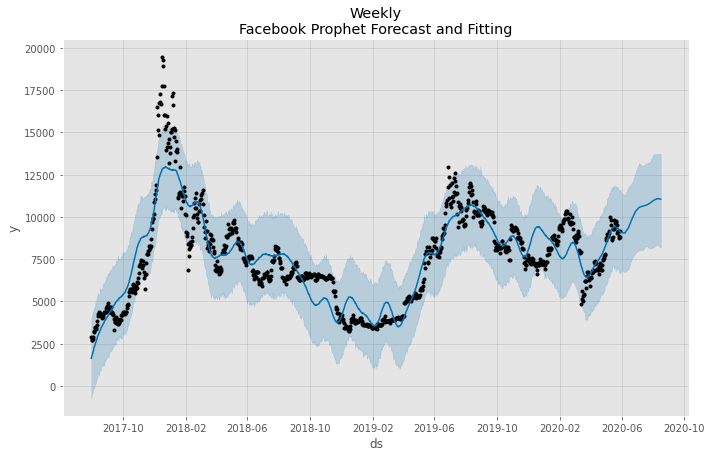

In [120]:
# Plotting the fit and forecast
mod.plot(forecast, uncertainty=True)
plt.title('Weekly\nFacebook Prophet Forecast and Fitting')
plt.show()

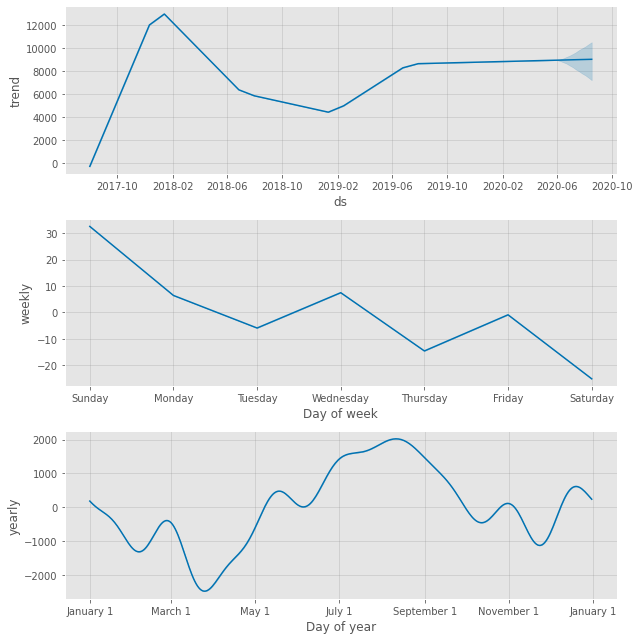

In [121]:
# Plotting the components
mod.plot_components(forecast)
plt.show()

In [122]:
fb_preds = pd.concat([day90pred, week12pred, month3pred], ignore_index=True).rename(columns={'yhat':'predictions'},
                                                                                    index={0:'day', 1:'week', 2:'month'})
print(fb_preds)

        predictions
day    10689.069439
week   11055.955718
month  10901.886788
